In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:


df_6 = pd.read_csv('data/info2/developers.csv')
fuente_6 = "https://github.com/github/innovationgraph/tree/main"




FileNotFoundError: [Errno 2] No such file or directory: 'data/info2/developers.csv'

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [ ]:
df_6

,developers,iso2_code,year,quarter
0,9763122,US,2020,1
1,6983489,EU,2020,1
2,5885036,CN,2020,1
3,4194257,IN,2020,1
4,1635516,GB,2020,1
...,...,...,...,...
4278,212,MH,2024,3
4279,195,VA,2024,3
4280,190,KI,2024,3
4281,173,PM,2024,3


In [ ]:
df_6_C = df_6[df_6["iso2_code"] != "EU"]

In [ ]:
df_6_C

,developers,iso2_code,year,quarter
0,9763122,US,2020,1
2,5885036,CN,2020,1
3,4194257,IN,2020,1
4,1635516,GB,2020,1
5,1400662,BR,2020,1
...,...,...,...,...
4278,212,MH,2024,3
4279,195,VA,2024,3
4280,190,KI,2024,3
4281,173,PM,2024,3


In [ ]:
df_6_C_grouped =df_6_C.groupby(['year', "quarter",'iso2_code'])['developers'].sum().reset_index()
df_6_C_grouped

,year,quarter,iso2_code,developers
0,2020,1,AD,1026
1,2020,1,AE,95190
2,2020,1,AF,6481
3,2020,1,AG,553
4,2020,1,AI,102
...,...,...,...,...
4240,2024,3,YE,72767
4241,2024,3,YT,1086
4242,2024,3,ZA,665394
4243,2024,3,ZM,32704


In [ ]:
df_6_C_grouped_sorted = df_6_C_grouped.sort_values(by=['year', "quarter", 'developers'], ascending=[True, True, False])
df_6_C_grouped_sorted

,year,quarter,iso2_code,developers
201,2020,1,US,9763122
41,2020,1,CN,5885036
92,2020,1,IN,4194257
67,2020,1,GB,1635516
28,2020,1,BR,1400662
...,...,...,...,...
4150,2024,3,MH,212
4231,2024,3,VA,195
4126,2024,3,KI,190
4182,2024,3,PM,173


In [ ]:
df_6_C_grouped_sorted['indice'] = df_6_C_grouped_sorted.groupby(['year', "quarter"]).cumcount() + 1
df_6_C_grouped_sorted

,year,quarter,iso2_code,developers,indice
201,2020,1,US,9763122,1
41,2020,1,CN,5885036,2
92,2020,1,IN,4194257,3
67,2020,1,GB,1635516,4
28,2020,1,BR,1400662,5
...,...,...,...,...,...
4150,2024,3,MH,212,222
4231,2024,3,VA,195,223
4126,2024,3,KI,190,224
4182,2024,3,PM,173,225


In [ ]:
df_6_C_grouped_sorted["year_quarter"] = df_6_C_grouped_sorted["year"].astype("str") +"-Q"+  df_6_C_grouped_sorted["quarter"].astype("str")
df_6_C_grouped_sorted

,year,quarter,iso2_code,developers,indice,year_quarter
201,2020,1,US,9763122,1,2020-Q1
41,2020,1,CN,5885036,2,2020-Q1
92,2020,1,IN,4194257,3,2020-Q1
67,2020,1,GB,1635516,4,2020-Q1
28,2020,1,BR,1400662,5,2020-Q1
...,...,...,...,...,...,...
4150,2024,3,MH,212,222,2024-Q3
4231,2024,3,VA,195,223,2024-Q3
4126,2024,3,KI,190,224,2024-Q3
4182,2024,3,PM,173,225,2024-Q3


In [ ]:
#df_6_C_limit = df_6_C_grouped_sorted[(df_6_C_grouped_sorted["indice"] >= 4) & (df_6_C_grouped_sorted["indice"] <= 10)]
#df_6_C_limit

df_6_C_limit = df_6_C_grouped_sorted[(df_6_C_grouped_sorted["indice"] <= 10)]
df_6_C_limit

,year,quarter,iso2_code,developers,indice,year_quarter
201,2020,1,US,9763122,1,2020-Q1
41,2020,1,CN,5885036,2,2020-Q1
92,2020,1,IN,4194257,3,2020-Q1
67,2020,1,GB,1635516,4,2020-Q1
28,2020,1,BR,1400662,5,2020-Q1
...,...,...,...,...,...,...
4192,2024,3,RU,3664948,6,2024-Q3
4110,2024,3,ID,3602191,7,2024-Q3
4070,2024,3,DE,3594869,8,2024-Q3
4122,2024,3,JP,3547125,9,2024-Q3


In [ ]:
df_6_C_limit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 67 to 4053
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          133 non-null    int64 
 1   quarter       133 non-null    int64 
 2   iso2_code     133 non-null    object
 3   developers    133 non-null    int64 
 4   indice        133 non-null    int64 
 5   year_quarter  133 non-null    object
dtypes: int64(4), object(2)
memory usage: 7.3+ KB


In [ ]:
from matplotlib.ticker import FuncFormatter

C:\Users\guill\AppData\Local\Temp\ipykernel_21156\3411241376.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_values = df_6_C_limit.groupby('iso2_code').apply(


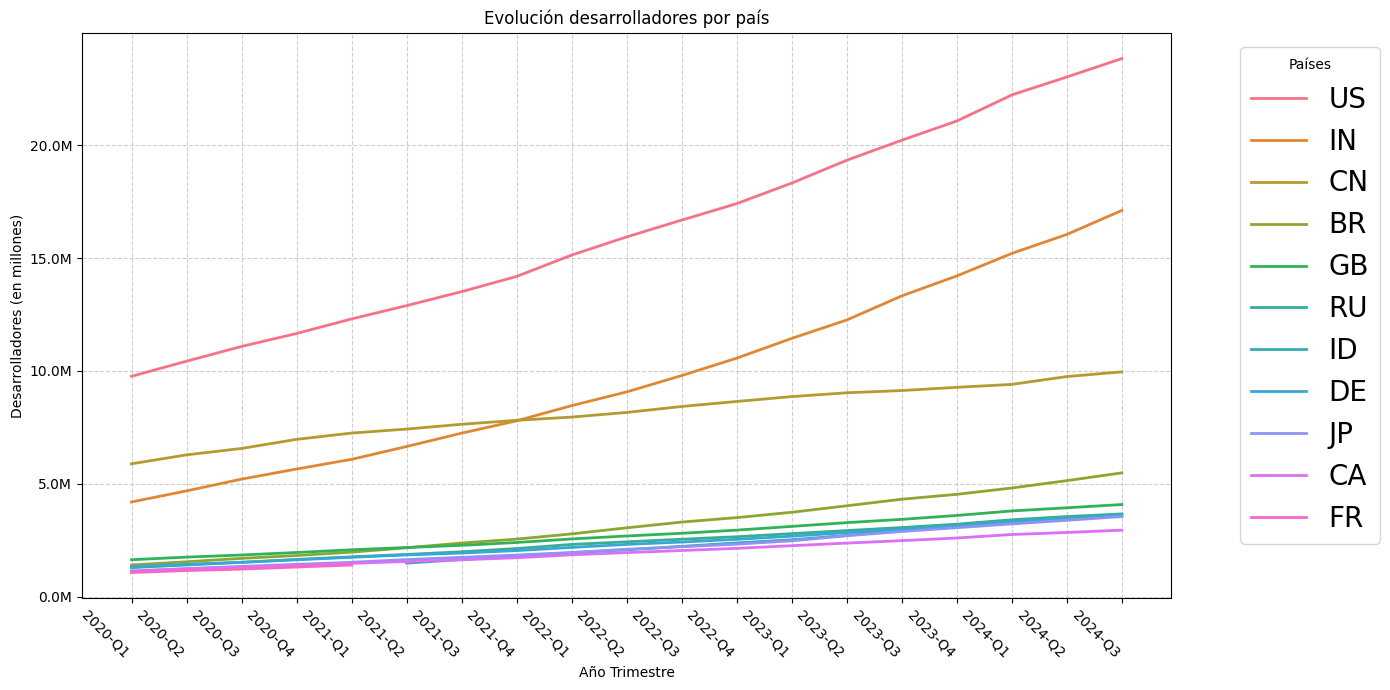

In [ ]:


# Step 1: Obtener el valor máximo de 'developers' al final de la serie temporal para cada país
latest_values = df_6_C_limit.groupby('iso2_code').apply(
    lambda x: x.loc[x['year_quarter'].idxmax(), 'developers']
).sort_values(ascending=False)

# Step 2: Obtener el orden de los países basado en el valor máximo de 'developers'
ordered_iso2_codes = latest_values.index

# Create a custom formatter function to display values in millions
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Divide by 1e6 to convert to millions and format to one decimal place

# Create the line plot
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_6_C_limit, x='year_quarter', y='developers', hue='iso2_code', 
             linewidth=2, hue_order=ordered_iso2_codes)

# Customize labels and title
plt.xlabel('Año Trimestre')
plt.ylabel('Desarrolladores (en millones)')
plt.title('Evolución desarrolladores por país')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=-45, ha='right')

# Apply the custom y-axis formatter to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Optional: Adjust the legend if needed
plt.legend(title='Países', loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 20})

# Show gridlines for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

# Tight layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()



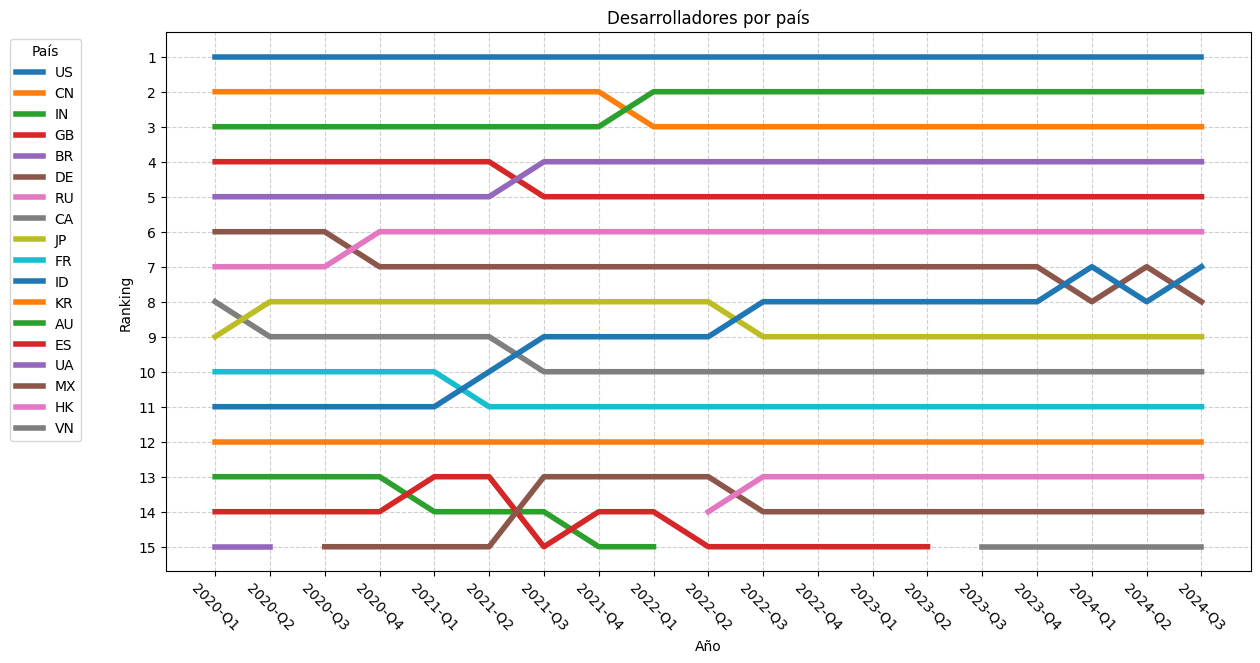

In [ ]:
# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar cada lenguaje individualmente
for pais in df_6_C_limit["iso2_code"].unique():
    subset = df_6_C_limit[df_6_C_limit["iso2_code"] == pais]
    plt.plot(subset["year_quarter"], subset["indice"], label=pais, linewidth=4)

# Invertir el eje Y para que 1 sea el top ranking
plt.gca().invert_yaxis()

# Personalizar ejes y leyenda
plt.xlabel("Año")
plt.ylabel("Ranking")
plt.title("Desarrolladores por país")
plt.xticks(df_6_C_limit["year_quarter"].unique(),rotation=-45)  # Asegurar que todos los años están en el eje X
plt.yticks(range(1, 16))
plt.legend(loc="upper left", bbox_to_anchor=(-0.15, 1), title="País")
plt.grid(True, linestyle="--", alpha=0.6)

In [ ]:
plt

In [ ]:
df_6_lenguaje10_unstack = df_6_lenguaje10.groupby(['year', "iso2_code"])['developers'].sum().unstack(fill_value=0)
df_6_lenguaje10_unstack

iso2_code,BR,CA,CN,DE,EU,GB,ID,IN,JP,RU,US
year,,,,,,,,,,,
2020,6459438,5052504,25700914,5902240,31114781,7184533,0,19739482,5138274,5851974,42943826
2021,9055907,6382934,30122283,7557419,39599309,8922001,0,27770055,6740792,7746886,52907915
2022,12630530,0,33191656,9448513,49577329,10994115,8619217,37899097,8588525,9936286,65181640
2023,16609633,0,36302333,11619149,60810219,13407927,11288411,51240281,11108099,11987019,78969117
2024,15435754,0,29116881,10364710,53906773,11812713,10372162,48374539,10149536,10615961,69106758


In [ ]:
from matplotlib.ticker import FuncFormatter

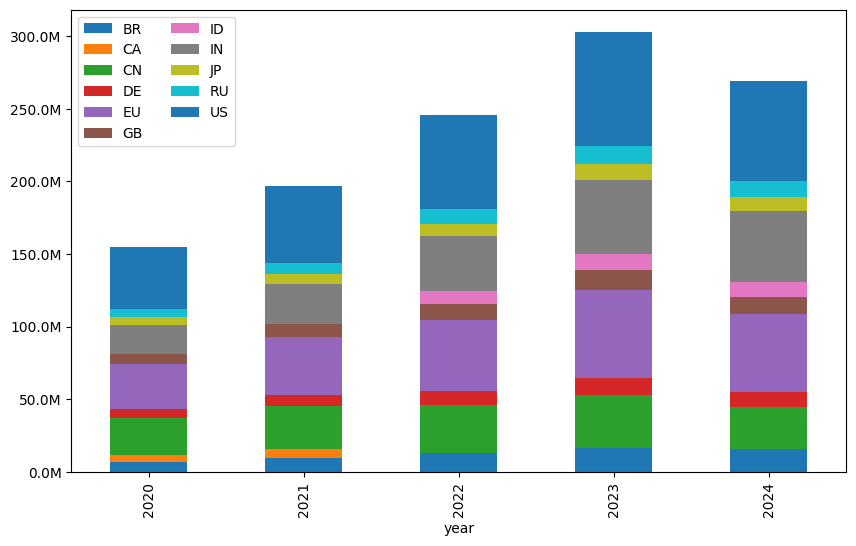

In [ ]:
grafica= df_6_lenguaje10_unstack.plot(kind='bar', stacked=True, figsize=(10, 6))
grafica.legend(ncol=2)
# Formatter function to display y-axis labels in millions
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Multiply by 1e-6 to convert to millions

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))